# Case study 1: Constant mortality risk in *Frontinella pyramitela*

TODO: Short explanation

In [1]:
import math
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import brentq

import figures
from cohort_model import (
    get_cohort_model_data,
    get_mean_and_std,
    population_survivorship_difference, 
    HYP_WILD_TYPE, 
    MUTANT_WILD
)
from fitness_calculations import get_fitness_data

## Survivorship curves (Figure 1 in paper)

In [2]:
# Figure 1 parameters
number_of_individuals = 1000 # Also used in figure 2
alpha = 0.000222             # Also used in figure 2
kappa = 0.033                # Also used in figure 2
epsilon = 0.04
hazard_rate_wild_type = 0.04015625 # 0.03855/(1 - epsilon) #TODO: Vise hvordan 0.03855 ble funnet
number_of_repetitions = 100
t_m_captivity = 201
t_m_wild = 100
t_m_hyp_wt = 100

In [3]:
%%time
captivity_population, wild_population, hyp_wt_population = get_cohort_model_data(
        t_m_captivity=t_m_captivity,
        t_m_wild=t_m_wild,
        t_m_hyp_wt=t_m_hyp_wt, 
        number_of_individuals=number_of_individuals,
        alpha=alpha,
        kappa=kappa,
        epsilon=epsilon,
        hazard_rate_wild_type=hazard_rate_wild_type, # 0.03855/(1 - epsilon) #TODO: Vise hvordan 0.03855 ble funnet
        number_of_repetitions=number_of_repetitions)

CPU times: user 7.68 s, sys: 7.32 s, total: 15 s
Wall time: 15.4 s


In [4]:
mean_captivity, std_captivity = get_mean_and_std(captivity_population)
mean_wild, _ = get_mean_and_std(wild_population)
mean_hyp_wt, std_hyp_wt = get_mean_and_std(hyp_wt_population)

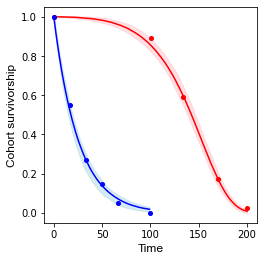

In [5]:
figures.plot_fig_1(
    t_m_captivity=t_m_captivity,
    t_m_wild=t_m_wild,
    t_m_hyp_wt=t_m_hyp_wt,
    mean_captivity=mean_captivity, 
    std_captivity=std_captivity, 
    mean_wild=mean_wild,
    mean_hyp_wt=mean_hyp_wt,
    std_hyp_wt=std_hyp_wt
)

## Predicted temporal difference between hypothetical wild type and mutant survivorship (Figure 2 in paper)

In [6]:
# Figure 2 parameters
number_of_repetitions = 1000 # Also used in figure 3
t_m = 100  # Also used in figure 3
epsilons = np.array([0.01, 0.02, 0.03, 0.04])
hazard_rates_wt = np.array([0.03893939, 0.03933673, 0.039742268,0.04015625]) # based on previous least-squares fitting: (1-epsilon)p_wt = 0.0385499

In [ ]:
%%time
population_simulations, mean_diff, std_diff = population_survivorship_difference(
    number_of_individuals=number_of_individuals,
    number_of_repetitions=number_of_repetitions,
    epsilons=epsilons,
    hazard_rates_wt=hazard_rates_wt,
    alpha=alpha,
    kappa=kappa,
    t_m=t_m
)

In [ ]:
figures.plot_fig_2(t_m, mean_diff, std_diff, number_of_repetitions)

## Pairwise comparison of predicted lifetime reproductive success and intrinsic rate of increase for the hypothetical wild type and mutant females (Figure 3 in paper)

In [ ]:
# Figure 3 parameters
# The population_simulations parameter is carried over as a result from calculations for figure 2
fertility_wt = [(39, 24.0), (79, 24.0)]
fertility_mut = [(39, 24.0), (79, 18.0)]

In [ ]:
%%time
fitness_stats_wt = get_fitness_data(population_simulations[HYP_WILD_TYPE], number_of_repetitions, t_m, fertility_wt)
fitness_stats_mut = get_fitness_data(population_simulations[MUTANT_WILD], number_of_repetitions, t_m, fertility_mut)

In [ ]:
figures.plot_fig_3(fitness_stats_wt, fitness_stats_mut)

mean_r0_wt = fitness_stats_wt["mean_r0"]
mean_r_wt = fitness_stats_wt["mean_r"]
mean_r0_mut = fitness_stats_mut["mean_r0"]
mean_r_mut = fitness_stats_mut["mean_r"]

print(f"Increase in R0 from hypothetical wild type to mutant: {(mean_r0_mut[3] - mean_r0_wt[3]) / mean_r0_wt[3] * 100:.2f}%")
print(f"Increase in r from hypothetical wild type to mutant: {(mean_r_mut[3] - mean_r_wt[3]) / mean_r_wt[3] * 100:.2f}%")